# NOISE TEST

### Brian2 stochastic noise

Here we will test the efficacy of using `xi` vs using `1/sqrt(dt) * randn()` for evaluating differantial equations.

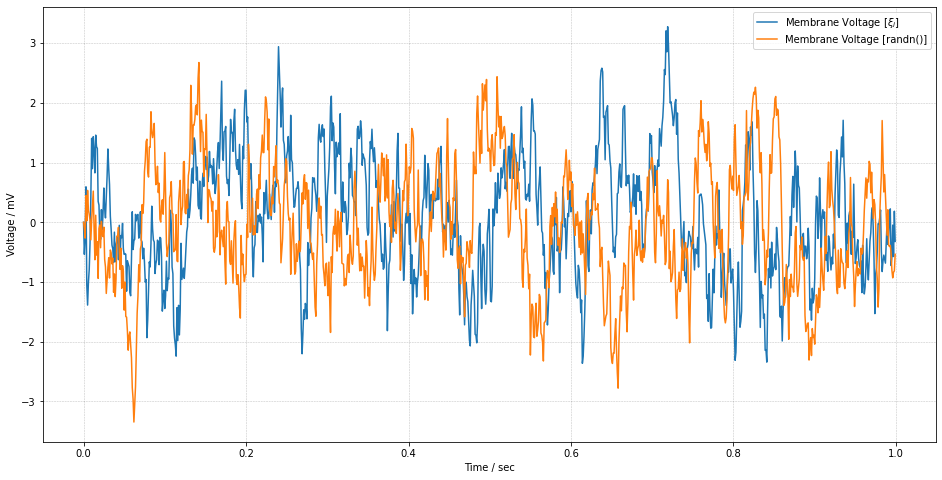

In [66]:
# Start by importing brian2
from brian2 import *

# And defining our equations
eqs_xi = '''
    dv/dt = -v/tau + sigma*sqrt(2/tau)*xi : volt
'''

eqs_rnd = '''
    dv/dt = -v/tau + sigma*sqrt(2/tau)*randn()/sqrt(tstep) : volt
    tstep : second
'''

# And our variables
tau = 10*ms
sigma = 1*mV
dt_sim = 1*ms
defaultclock.dt = dt_sim

# Define our groups
G_xi = NeuronGroup(1, eqs_xi, method='euler')
G_rnd = NeuronGroup(1, eqs_rnd, method='euler')
G_rnd.tstep = defaultclock.dt

# Add state monitors to see the voltage
mon1 = StateMonitor(G_xi, 'v', record=True)
mon2 = StateMonitor(G_rnd, 'v', record=True)

# Make a network
net = Network()
net.add(G_xi)
net.add(G_rnd)
net.add(mon1)
net.add(mon2)

# Run a simulation
net.run(1*second)

# Plotting results
fig = figure(figsize=(16,8))
plt.plot(mon1.t/second, mon1.v[0]/mV, label=r"Membrane Voltage [$\xi_i$]")
plt.plot(mon2.t/second, mon2.v[0]/mV, label=r"Membrane Voltage [randn()]")
plt.xlabel('Time / sec')
plt.ylabel('Voltage / mV')
plt.legend(loc=0)
plt.grid(color='black', linestyle='--', linewidth=0.5, alpha=0.25, zorder=-10.)

In [ ]:
# Note: The noise term for a Hodgkin-Huxley neuron in the equations can be added as shown here
# https://brian.discourse.group/t/how-to-add-stochastic-equations-with-exponential-euler/259/2
eqs_noise = '''
noise = sigma*(2*gl/Cm)**.5*randn()/sqrt(dt) : volt/second (constant over dt)
'''